In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model, model_selection
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import lightgbm as lgb
import xgboost as xgb   

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,BatchNormalization,Dropout
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras

In [62]:
df = pd.read_excel("the total emissions data from three carbon-emitting sectors.xlsx")
df = df.drop(columns=['日期','iso_code','国家'])
df.head()

,carbon emission,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,...,Brent Crude Oil_Spot_Prices,Natural Gas Futures,European Renewable Energy Total Return,FTSE100,DAX30,S&P500,STOXX50,Rotterdam,US 3Ybond,EN Carbon market
0,9.20637,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014979,0.026763,0.002259,0.009196,0.003472,0.008797,0.006284,0.021592,0.062370,0.002259
1,9.18042,0.693147,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.009618,-0.067884,0.015167,0.000787,-0.002105,-0.001937,-0.002600,-0.003964,-0.077333,0.015167
2,9.53820,0.693147,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004309,-0.002914,-0.001672,0.000523,0.000564,0.002783,-0.001193,0.001587,0.029705,-0.001672
3,9.84854,1.098612,1.098612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000614,0.017765,0.005666,0.000834,0.004641,-0.007981,0.000893,0.003957,0.052268,0.005666
4,10.15594,1.098612,1.098612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030666,0.044452,-0.001130,0.005389,-0.003344,-0.001286,-0.001903,0.010998,-0.097164,-0.001130


In [63]:
X = df.drop(columns=['carbon emission'])
y=df['carbon emission']
X = X.dropna() 
y = y[X.index] 
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

MSE：0.4727	RMSE:0.5003	MAE:0.6875	R2:0.6771


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12260\3433563133.py:19: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_pred,test_y,s=40,edgecolors='none', alpha=0.7,marker='x',color='orange',label='extra tree test')


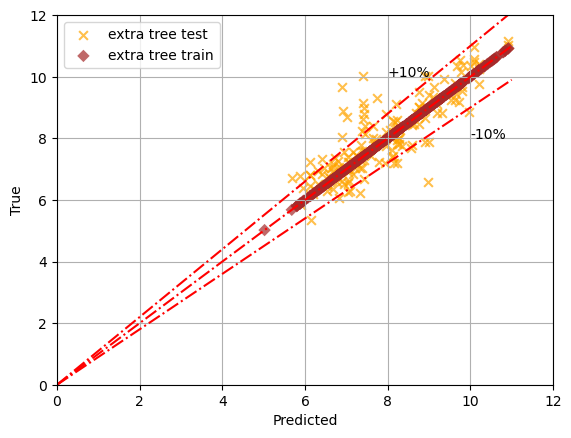

In [61]:
#train_evaluate extra tree test
model = ExtraTreeRegressor()
train_x,test_x,train_y,test_y = train_test_split(X,y)
model.fit(train_x, train_y)  
y_pred = model.predict(test_x) 
mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y,y_pred)
r2 = r2_score(test_y,y_pred)
print("MSE：{}\tRMSE:{}\tMAE:{}\tR2:{}".format(mse,np.sqrt(mse),mae,r2))


x = np.arange(0,12)
y = x
y1 = x*0.9
y2 = x*1.1
plt.scatter(y_pred,test_y,s=40,edgecolors='none', alpha=0.7,marker='x',color='orange',label='extra tree test')
plt.scatter(model.predict(train_x),train_y,s=40,edgecolors='none', alpha=0.7,marker='D',color='brown',label='extra tree train')
plt.xlim([0,12])
plt.ylim([0,12])
plt.text(8,10,"+10%")
plt.text(10,8,"-10%")
plt.xlabel('Predicted')
plt.ylabel("True")
plt.grid(True)
plt.legend()
plt.plot(x,y,color='red',linestyle='-.')
plt.plot(x,y1,color='red',linestyle='-.')
plt.plot(x,y2,color='red',linestyle='-.')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 0.377068	valid_0's l1: 0.454225
MSE：0.3703	RMSE:0.60

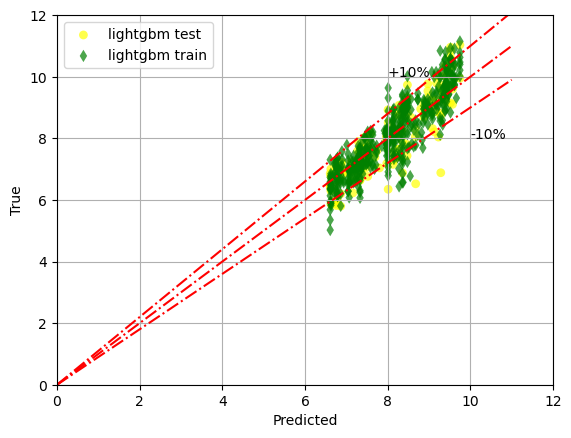

In [54]:
#train_evaluate light_gbm model
lgb_train=lgb.Dataset(train_x,train_y)
lgb_eval=lgb.Dataset(test_x,test_y,reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.4,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
gbm = lgb.train(
  params,
  lgb_train,
  num_boost_round=20,
  valid_sets=lgb_eval,
  callbacks=[lgb.early_stopping(stopping_rounds=5)]
)
gbm_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)
MSEgbm=mean_squared_error(test_y,gbm_pred)
gbm_pred_train = gbm.predict(train_x,num_iteration=gbm.best_iteration)
mse = mean_squared_error(test_y, gbm_pred)
mae = mean_absolute_error(test_y,gbm_pred)
r2 = r2_score(test_y,gbm_pred)
print("MSE：{}\tRMSE:{}\tMAE:{}\tR2:{}".format(mse,np.sqrt(mse),mae,r2))


x = np.arange(0,12)
y = x
y1 = x*0.9
y2 = x*1.1
plt.scatter(gbm_pred,test_y,s=40,edgecolors='none', alpha=0.7,marker='o',color='yellow',label='lightgbm test')
plt.scatter(gbm_pred_train,train_y,s=40,edgecolors='none', alpha=0.7,marker='d',color='green',label='lightgbm train')
plt.xlim([0,12])
plt.ylim([0,12])
plt.text(8,10,"+10%")
plt.text(10,8,"-10%")
plt.xlabel('Predicted')
plt.ylabel("True")
plt.grid(True)
plt.legend()
plt.plot(x,y,color='red',linestyle='-.')
plt.plot(x,y1,color='red',linestyle='-.')
plt.plot(x,y2,color='red',linestyle='-.')

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:18:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


MSE：0.3998	RMSE:0.6323	MAE:0.4928	R2:0.7277


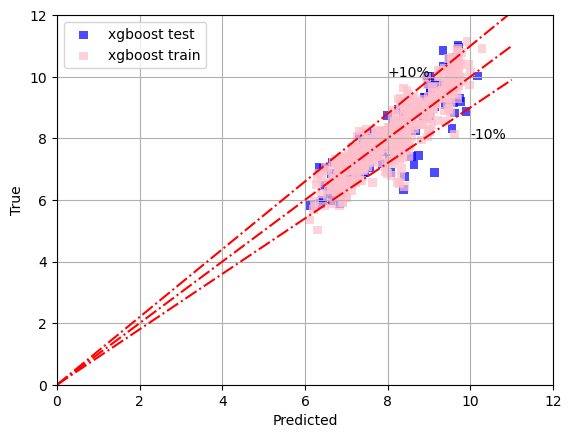

In [58]:
#train_evaluate xgboost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
dtrain = xgb.DMatrix(X_train, label=y_train)  
dtest = xgb.DMatrix(X_test, label=y_test)  
params = {  
    'objective': 'reg:squarederror',  
    'max_depth': 1,  
    'eta': 0.1,  
    'silent': 1,  
    'eval_metric': 'rmse'  
}  
eval_list = [(dtrain, 'train'), (dtest, 'eval')]  
num_round = 1000  
evals_result = {}  
bst_model = xgb.train(params, dtrain, num_round, evals=eval_list, evals_result=evals_result, verbose_eval=False)  
xgboost_eval_rmse = evals_result['eval']['rmse']  
xgb_pred_test = bst_model.predict(dtest)
xgb_pred_train = bst_model.predict(dtrain)
mse = mean_squared_error(y_test, xgb_pred_test)
mae = mean_absolute_error(y_test,xgb_pred_test)
r2 = r2_score(y_test,xgb_pred_test)
print("MSE：{}\tRMSE:{}\tMAE:{}\tR2:{}".format(mse,np.sqrt(mse),mae,r2))

x = np.arange(0,12)
y = x
y1 = x*0.9
y2 = x*1.1
plt.scatter(xgb_pred_test,y_test,s=40,edgecolors='none', alpha=0.7,marker='s',color='blue',label='xgboost test')
plt.scatter(xgb_pred_train,y_train,s=40,edgecolors='none', alpha=0.7,marker='s',color='pink',label='xgboost train')
plt.xlim([0,12])
plt.ylim([0,12])
plt.text(8,10,"+10%")
plt.text(10,8,"-10%")
plt.xlabel('Predicted')
plt.ylabel("True")
plt.grid(True)
plt.legend()
plt.plot(x,y,color='red',linestyle='-.')
plt.plot(x,y1,color='red',linestyle='-.')
plt.plot(x,y2,color='red',linestyle='-.')

In [67]:
#train_evaluate other  machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  
def evaulate(y_test,pred_test,model_name):
    mse = mean_squared_error(y_test, pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    r2 = r2_score(y_test,xgb_pred_test)
    print("{}:\tMSE：{}\tRMSE:{}\tMAE:{}\tR2:{}".format(model_name,mse,np.sqrt(mse),mae,r2))

model_1 = LinearRegression()
model_1.fit(X_train,y_train)
model_1_pred = model_1.predict(X_test)
evaulate(model_1_pred,y_test,"LinearRegression")

model_2 = Ridge()
model_2.fit(X_train,y_train)
model_2_pred = model_2.predict(X_test)
evaulate(model_2_pred,y_test,"Ridge")

model_3 = BayesianRidge()
model_3.fit(X_train,y_train)
model_3_pred = model_3.predict(X_test)
evaulate(model_3_pred,y_test,"BayesianRidge")

LinearRegression:	MSE：0.8059	RMSE:0.8977	MAE:0.6995	R2:0.4523
Ridge:	MSE：0.8551	RMSE:0.7204	MAE:0.9247	R2:0.4201
BayesianRidge:	MSE：0.8202	RMSE:0.7071	MAE:0.9056	R2:0.4433


In [83]:
#train_evaluate SAMNTS model
df = pd.read_excel("the total emissions data from four carbon-emitting sectors.xlsx")
df = df.drop(columns=['日期','iso_code','国家'])
X = df[100:]
y=X['carbon emission']
X = X.drop(columns=['carbon emission','date'])
X = X.drop(columns=['daily_people_vaccinated_per_hundred'])
#X = X.dropna() 
new_list = [item.replace('_', ' ') for item in X.columns]
X.columns = new_list

def create_dataset(data, lookback=1):
    X, y = [], []
    for i in range(len(data)-lookback):
        X.append(data[i:i+lookback, :])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(y).reshape(-1,1))
X_time,y_time = create_dataset(scaled_data,10)
train_x,test_x,train_y,test_y = train_test_split(X_time,y_time,random_state=42)
model = Sequential()
model.add(LSTM(100, input_shape=(10, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=1, verbose=2,validation_data=(test_x,test_y))
ttest_x = model.predict(test_x)
ttrain_x = model.predict(train_x)
test_predict = scaler.inverse_transform(ttest_x)
train_predict = scaler.inverse_transform(ttrain_x)
Y_rel = scaler.inverse_transform(np.array(test_y).reshape(-1,1))
input1  = tf.constant(test_predict)

def train_evual_modal(model,X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor):
    loss_arr = []
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs = 2000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        if(epoch%10 == 0):
            loss_arr.append(loss)
        loss.backward()
        optimizer.step()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    model.eval()  
    with torch.no_grad():  
        y_pred = model(X_test_tensor)  
        y_test = y_test_tensor.view(-1)  
        y_pred = y_pred.view(-1)  
        test_loss = criterion(y_pred, y_test)  
    return loss_arr

scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X[11:])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y[11:])

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).view(-1, 1)

class SAMNTS(nn.Module):  
    def __init__(self):  
        super(SAMNTS, self).__init__()  
        self.layer1 = nn.Sequential(  
            nn.Linear(29, 64),  
            nn.ReLU(),  
            nn.BatchNorm1d(64),  
            nn.Dropout(0.2)  
        )  
        self.layer2 = nn.Sequential(  
            nn.Linear(64, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.residual_connection = nn.Linear(29, 64)
        self.output_layer = nn.Linear(128, 1)  
  
    def forward(self, x):  
        x1 = self.layer1(x)   
        x_residual = self.residual_connection(x)  
        x1 = x1 + x_residual  
        x2 = self.layer2(x1)   
        x_out = self.output_layer(x2)  
        return x_out  
model = SAMNTS()  
train_evual_modal(model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)
input2 = tf.constant(model(X_test_tensor).detach().numpy())
input2_1 = tf.constant(model(X_train_tensor).detach().numpy())

attention_layer = keras.layers.Attention()
attention_weights = attention_layer([input1,input2])/11
combined_output = attention_weights*input1 + (1-attention_weights)*input2

Epoch 1/10
394/394 - 2s - loss: 0.0204 - val_loss: 0.0278 - 2s/epoch - 4ms/step
Epoch 2/10
394/394 - 1s - loss: 0.0128 - val_loss: 0.0118 - 735ms/epoch - 2ms/step
Epoch 3/10
394/394 - 1s - loss: 0.0113 - val_loss: 0.0123 - 751ms/epoch - 2ms/step
Epoch 4/10
394/394 - 1s - loss: 0.0099 - val_loss: 0.0111 - 722ms/epoch - 2ms/step
Epoch 5/10
394/394 - 1s - loss: 0.0084 - val_loss: 0.0096 - 746ms/epoch - 2ms/step
Epoch 6/10
394/394 - 1s - loss: 0.0085 - val_loss: 0.0098 - 731ms/epoch - 2ms/step
Epoch 7/10
394/394 - 1s - loss: 0.0079 - val_loss: 0.0094 - 760ms/epoch - 2ms/step
Epoch 8/10
394/394 - 1s - loss: 0.0076 - val_loss: 0.0085 - 751ms/epoch - 2ms/step
Epoch 9/10
394/394 - 1s - loss: 0.0080 - val_loss: 0.0093 - 748ms/epoch - 2ms/step
Epoch 10/10
394/394 - 1s - loss: 0.0076 - val_loss: 0.0104 - 724ms/epoch - 2ms/step
13/13 [==============================] - 0s 3ms/step
Epoch [1/2000], Loss: 68.8289
Epoch [2/2000], Loss: 68.4995
Epoch [3/2000], Loss: 68.2631
Epoch [4/2000], Loss: 67.6631

Epoch [265/2000], Loss: 1.7343
Epoch [266/2000], Loss: 1.8373
Epoch [267/2000], Loss: 1.7922
Epoch [268/2000], Loss: 1.9857
Epoch [269/2000], Loss: 1.5927
Epoch [270/2000], Loss: 2.1977
Epoch [271/2000], Loss: 2.1481
Epoch [272/2000], Loss: 2.2581
Epoch [273/2000], Loss: 1.8647
Epoch [274/2000], Loss: 2.1644
Epoch [275/2000], Loss: 1.6913
Epoch [276/2000], Loss: 1.6967
Epoch [277/2000], Loss: 1.9772
Epoch [278/2000], Loss: 1.7498
Epoch [279/2000], Loss: 1.9899
Epoch [280/2000], Loss: 1.8467
Epoch [281/2000], Loss: 1.7026
Epoch [282/2000], Loss: 1.6863
Epoch [283/2000], Loss: 2.1715
Epoch [284/2000], Loss: 2.0030
Epoch [285/2000], Loss: 2.1028
Epoch [286/2000], Loss: 2.1581
Epoch [287/2000], Loss: 1.6500
Epoch [288/2000], Loss: 1.7491
Epoch [289/2000], Loss: 1.9094
Epoch [290/2000], Loss: 1.7250
Epoch [291/2000], Loss: 1.8049
Epoch [292/2000], Loss: 1.9542
Epoch [293/2000], Loss: 1.6373
Epoch [294/2000], Loss: 1.6930
Epoch [295/2000], Loss: 1.8461
Epoch [296/2000], Loss: 1.4809
Epoch [2

Epoch [603/2000], Loss: 0.8963
Epoch [604/2000], Loss: 1.0798
Epoch [605/2000], Loss: 0.9769
Epoch [606/2000], Loss: 1.3359
Epoch [607/2000], Loss: 1.2346
Epoch [608/2000], Loss: 1.1755
Epoch [609/2000], Loss: 1.2266
Epoch [610/2000], Loss: 1.1238
Epoch [611/2000], Loss: 0.9919
Epoch [612/2000], Loss: 1.2158
Epoch [613/2000], Loss: 1.0591
Epoch [614/2000], Loss: 1.1136
Epoch [615/2000], Loss: 1.0992
Epoch [616/2000], Loss: 1.6363
Epoch [617/2000], Loss: 1.1347
Epoch [618/2000], Loss: 1.2197
Epoch [619/2000], Loss: 1.3499
Epoch [620/2000], Loss: 1.2703
Epoch [621/2000], Loss: 1.0578
Epoch [622/2000], Loss: 1.1330
Epoch [623/2000], Loss: 1.2625
Epoch [624/2000], Loss: 1.0985
Epoch [625/2000], Loss: 1.3221
Epoch [626/2000], Loss: 1.0403
Epoch [627/2000], Loss: 1.2336
Epoch [628/2000], Loss: 1.1226
Epoch [629/2000], Loss: 1.0941
Epoch [630/2000], Loss: 1.1210
Epoch [631/2000], Loss: 1.1147
Epoch [632/2000], Loss: 1.1672
Epoch [633/2000], Loss: 1.2891
Epoch [634/2000], Loss: 1.1553
Epoch [6

Epoch [905/2000], Loss: 0.9222
Epoch [906/2000], Loss: 0.9730
Epoch [907/2000], Loss: 0.7481
Epoch [908/2000], Loss: 0.8396
Epoch [909/2000], Loss: 0.9222
Epoch [910/2000], Loss: 0.8177
Epoch [911/2000], Loss: 0.8223
Epoch [912/2000], Loss: 0.7650
Epoch [913/2000], Loss: 0.7915
Epoch [914/2000], Loss: 0.7465
Epoch [915/2000], Loss: 0.8968
Epoch [916/2000], Loss: 0.8613
Epoch [917/2000], Loss: 0.6711
Epoch [918/2000], Loss: 1.0329
Epoch [919/2000], Loss: 0.9202
Epoch [920/2000], Loss: 0.7969
Epoch [921/2000], Loss: 0.7963
Epoch [922/2000], Loss: 0.9154
Epoch [923/2000], Loss: 0.7231
Epoch [924/2000], Loss: 0.6054
Epoch [925/2000], Loss: 1.0682
Epoch [926/2000], Loss: 0.8865
Epoch [927/2000], Loss: 0.6436
Epoch [928/2000], Loss: 0.7993
Epoch [929/2000], Loss: 0.6595
Epoch [930/2000], Loss: 0.7932
Epoch [931/2000], Loss: 0.9538
Epoch [932/2000], Loss: 0.7885
Epoch [933/2000], Loss: 0.6827
Epoch [934/2000], Loss: 0.7377
Epoch [935/2000], Loss: 0.7757
Epoch [936/2000], Loss: 0.6839
Epoch [9

Epoch [1207/2000], Loss: 0.5301
Epoch [1208/2000], Loss: 0.5023
Epoch [1209/2000], Loss: 0.6738
Epoch [1210/2000], Loss: 0.4961
Epoch [1211/2000], Loss: 0.6159
Epoch [1212/2000], Loss: 0.5380
Epoch [1213/2000], Loss: 0.7526
Epoch [1214/2000], Loss: 0.5855
Epoch [1215/2000], Loss: 0.5539
Epoch [1216/2000], Loss: 0.5774
Epoch [1217/2000], Loss: 0.5235
Epoch [1218/2000], Loss: 0.4441
Epoch [1219/2000], Loss: 0.4763
Epoch [1220/2000], Loss: 0.5639
Epoch [1221/2000], Loss: 0.5788
Epoch [1222/2000], Loss: 0.4681
Epoch [1223/2000], Loss: 0.5054
Epoch [1224/2000], Loss: 0.5670
Epoch [1225/2000], Loss: 0.5812
Epoch [1226/2000], Loss: 0.7173
Epoch [1227/2000], Loss: 0.6615
Epoch [1228/2000], Loss: 0.5478
Epoch [1229/2000], Loss: 0.5560
Epoch [1230/2000], Loss: 0.5559
Epoch [1231/2000], Loss: 0.5990
Epoch [1232/2000], Loss: 0.4920
Epoch [1233/2000], Loss: 0.7068
Epoch [1234/2000], Loss: 0.5344
Epoch [1235/2000], Loss: 0.7177
Epoch [1236/2000], Loss: 0.5571
Epoch [1237/2000], Loss: 0.5838
Epoch [1

Epoch [1499/2000], Loss: 0.3824
Epoch [1500/2000], Loss: 0.5073
Epoch [1501/2000], Loss: 0.4579
Epoch [1502/2000], Loss: 0.4606
Epoch [1503/2000], Loss: 0.3950
Epoch [1504/2000], Loss: 0.4963
Epoch [1505/2000], Loss: 0.4246
Epoch [1506/2000], Loss: 0.4228
Epoch [1507/2000], Loss: 0.3975
Epoch [1508/2000], Loss: 0.4097
Epoch [1509/2000], Loss: 0.4327
Epoch [1510/2000], Loss: 0.4441
Epoch [1511/2000], Loss: 0.4382
Epoch [1512/2000], Loss: 0.4366
Epoch [1513/2000], Loss: 0.4972
Epoch [1514/2000], Loss: 0.5177
Epoch [1515/2000], Loss: 0.3728
Epoch [1516/2000], Loss: 0.3830
Epoch [1517/2000], Loss: 0.4331
Epoch [1518/2000], Loss: 0.4112
Epoch [1519/2000], Loss: 0.4867
Epoch [1520/2000], Loss: 0.4480
Epoch [1521/2000], Loss: 0.4472
Epoch [1522/2000], Loss: 0.4363
Epoch [1523/2000], Loss: 0.4963
Epoch [1524/2000], Loss: 0.5243
Epoch [1525/2000], Loss: 0.5575
Epoch [1526/2000], Loss: 0.4265
Epoch [1527/2000], Loss: 0.5159
Epoch [1528/2000], Loss: 0.4345
Epoch [1529/2000], Loss: 0.4403
Epoch [1

Epoch [1826/2000], Loss: 0.3354
Epoch [1827/2000], Loss: 0.3291
Epoch [1828/2000], Loss: 0.3006
Epoch [1829/2000], Loss: 0.3442
Epoch [1830/2000], Loss: 0.3219
Epoch [1831/2000], Loss: 0.2981
Epoch [1832/2000], Loss: 0.3484
Epoch [1833/2000], Loss: 0.3506
Epoch [1834/2000], Loss: 0.3655
Epoch [1835/2000], Loss: 0.2973
Epoch [1836/2000], Loss: 0.3333
Epoch [1837/2000], Loss: 0.3808
Epoch [1838/2000], Loss: 0.2956
Epoch [1839/2000], Loss: 0.3750
Epoch [1840/2000], Loss: 0.3504
Epoch [1841/2000], Loss: 0.3532
Epoch [1842/2000], Loss: 0.2709
Epoch [1843/2000], Loss: 0.2931
Epoch [1844/2000], Loss: 0.3046
Epoch [1845/2000], Loss: 0.3044
Epoch [1846/2000], Loss: 0.3562
Epoch [1847/2000], Loss: 0.3190
Epoch [1848/2000], Loss: 0.3575
Epoch [1849/2000], Loss: 0.3491
Epoch [1850/2000], Loss: 0.3283
Epoch [1851/2000], Loss: 0.2979
Epoch [1852/2000], Loss: 0.3568
Epoch [1853/2000], Loss: 0.3416
Epoch [1854/2000], Loss: 0.3468
Epoch [1855/2000], Loss: 0.3101
Epoch [1856/2000], Loss: 0.3280
Epoch [1

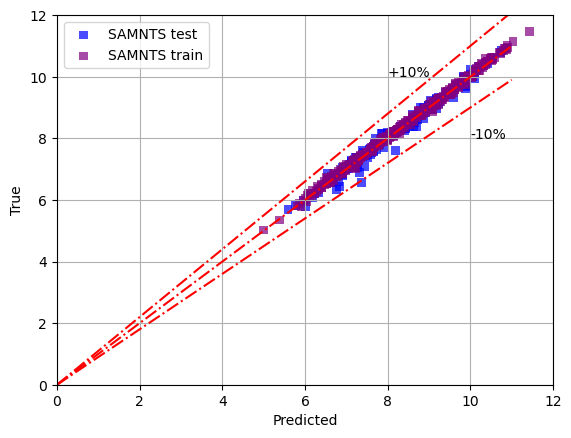

In [81]:
x = np.arange(0,12)
y = x
y1 = x*0.9
y2 = x*1.1
plt.scatter(input2,y_test_tensor,s=40,edgecolors='none', alpha=0.7,marker='s',color='blue',label='SAMNTS test')
plt.scatter(input2_1,y_train_tensor,s=40,edgecolors='none', alpha=0.7,marker='s',color='purple',label='SAMNTS train')
plt.xlim([0,12])
plt.ylim([0,12])
plt.text(8,10,"+10%")
plt.text(10,8,"-10%")
plt.xlabel('Predicted')
plt.ylabel("True")
plt.grid(True)
plt.legend()
plt.plot(x,y,color='red',linestyle='-.')
plt.plot(x,y1,color='red',linestyle='-.')
plt.plot(x,y2,color='red',linestyle='-.')

[20:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.



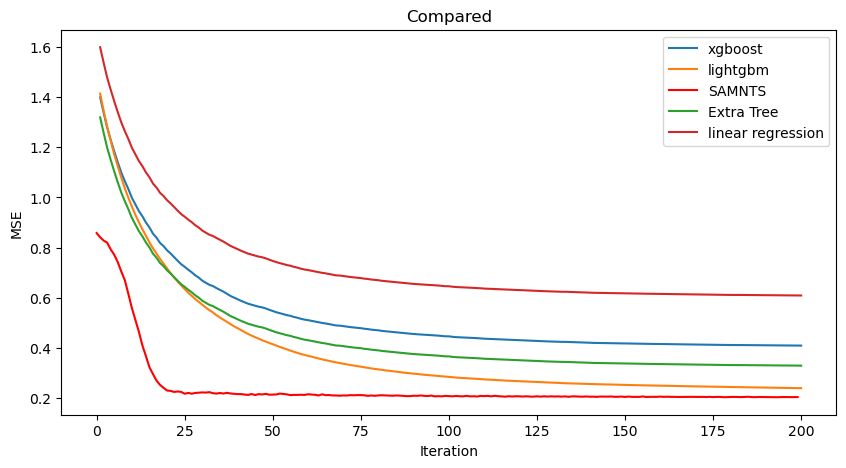

In [36]:
# Plotting a Convergence Graph
plt.figure(figsize=(10, 5))  
plt.plot(np.arange(1, len(eval_rmse_1) + 1), np.array(eval_rmse_1), label='xgboost')  
plt.plot(np.arange(1, len(eval_rmse_2) + 1), np.array(eval_rmse_2), label='lightgbm')  
plt.plot(np.arange(len(loss_arr)),np.array(loss_arr),label='SAMNTS',color ='r')
plt.plot(np.arange(1, len(eval_rmse_3) + 1), np.array(eval_rmse_3), label='Extra Tree') 
plt.plot(np.arange(1, len(eval_rmse_4) + 1), np.array(eval_rmse_4), label='linear regression')  
plt.title('Compared')  
plt.xlabel('Iteration')  
plt.ylabel('MSE')  
plt.legend()  
plt.show()